<a href="https://colab.research.google.com/github/WilliamAshbee/splineexample/blob/main/InvertedAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# import packages
import os
import torch 
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
 
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision.utils import save_image

In [11]:
#https://debuggercafe.com/implementing-deep-autoencoder-in-pytorch/

In [12]:
# constants
NUM_EPOCHS = 10
LEARNING_RATE = 1e-3
BATCH_SIZE = 128

# image transformations
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [13]:
trainset = datasets.FashionMNIST(
    root='./data',
    train=True, 
    download=True,
    transform=transform
)
testset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
trainloader = DataLoader(
    trainset, 
    batch_size=BATCH_SIZE,
    shuffle=True
)
testloader = DataLoader(
    testset, 
    batch_size=BATCH_SIZE, 
    shuffle=True
)

In [14]:
# utility functions
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device
def make_dir():
    image_dir = 'FashionMNIST_Images'
    if not os.path.exists(image_dir):
        os.makedirs(image_dir)
def save_decoded_image(img, epoch):
    img = img.view(img.size(0), 1, 28, 28)
    save_image(img, './FashionMNIST_Images/linear_ae_image{}.png'.format(epoch))

In [35]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # encoder
        ins = 784
        self.enc1 = nn.Linear(in_features=ins, out_features=ins*3)
        self.enc2 = nn.Linear(in_features=ins*3, out_features=ins*6)

        # decoder 
        self.dec4 = nn.Linear(in_features=ins*6, out_features=ins*3)
        self.dec5 = nn.Linear(in_features=ins*3, out_features=ins)

    def forward(self, x):
        x = F.relu(self.enc1(x))
        x = F.relu(self.enc2(x))

        x = F.relu(self.dec4(x))
        x = F.relu(self.dec5(x))
        return x

net = Autoencoder()
print(net)


Autoencoder(
  (enc1): Linear(in_features=784, out_features=2352, bias=True)
  (enc2): Linear(in_features=2352, out_features=4704, bias=True)
  (dec4): Linear(in_features=4704, out_features=2352, bias=True)
  (dec5): Linear(in_features=2352, out_features=784, bias=True)
)


In [36]:
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=LEARNING_RATE)


cuda
Epoch 1 of 10, Train Loss: 0.037
Epoch 2 of 10, Train Loss: 0.018
Epoch 3 of 10, Train Loss: 0.015
Epoch 4 of 10, Train Loss: 0.013
Epoch 5 of 10, Train Loss: 0.012
Epoch 6 of 10, Train Loss: 0.011
Epoch 7 of 10, Train Loss: 0.011
Epoch 8 of 10, Train Loss: 0.010
Epoch 9 of 10, Train Loss: 0.010
Epoch 10 of 10, Train Loss: 0.009


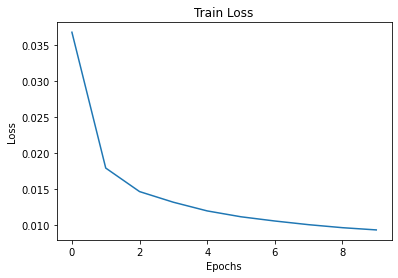

In [37]:
# get the computation device
device = torch.device("cuda")
#get_device()
print(device)
# load the neural network onto the device
net.to(device)
make_dir()
# train the network
train_loss = train(net, trainloader, NUM_EPOCHS)
plt.figure()
plt.plot(train_loss)
plt.title('Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('deep_ae_fashionmnist_loss.png')
# test the network
test_image_reconstruction(net, testloader)